In [1]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
#from google.colab import files
#import io
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.callbacks import ReduceLROnPlateau

In [2]:
# generate data (train and validation)

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                vertical_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        'D:/Dokumen/PCD/foto_uang/train',
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = validation_datagen.flow_from_directory(
        'D:/Dokumen/PCD/foto_uang/valid',
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')
print(train_generator)
print(validation_generator)

Found 420 images belonging to 7 classes.


Found 280 images belonging to 7 classes.


In [3]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       591,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 599,799 (2.29 MB)

 Trainable params: 599,799 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# compile model with 'adam' optimizer and 'categorical_crossentropy' loss function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction]
)

Epoch 1/20


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.1401 - loss: 2.3853 - val_accuracy: 0.1357 - val_loss: 1.9459 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1594 - loss: 1.9481 - val_accuracy: 0.1429 - val_loss: 1.9457 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1683 - loss: 1.9455 - val_accuracy: 0.1429 - val_loss: 1.9445 - learning_rate: 0.0010
Epoch 4/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.0999 - loss: 1.9480
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1041 - loss: 1.9478 - val_accuracy: 0.1429 - val_loss: 1.9451 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1605 - loss: 1.9426 - val_accuracy: 0.2357 - val_loss: 1.9447 - learning_rate: 5.0000e-04
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2017 - loss: 1.9385 - val_accuracy: 0.3036

In [12]:
# function for plotting accuracy and loss

def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [23]:
# function for model evaluation

def evaluate(model):

  validation_generator = train_datagen.flow_from_directory(
          'D:/Dokumen/PCD/data_uang/valid',
          target_size=(150,150),
          batch_size=32,
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_train_samples = 378
  num_of_test_samples = 28

  Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['polabunga_uang_dua_puluh_ribu', 'polabunga_uang_dua_ribu', 'polabunga_uang_lima_puluh_ribu', 'polabunga_uang_lima_ribu', 'polabunga_uang_sepuluh_ribu', 'polabunga_uang_seratus_ribu', 'polabunga_uang_seribu']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

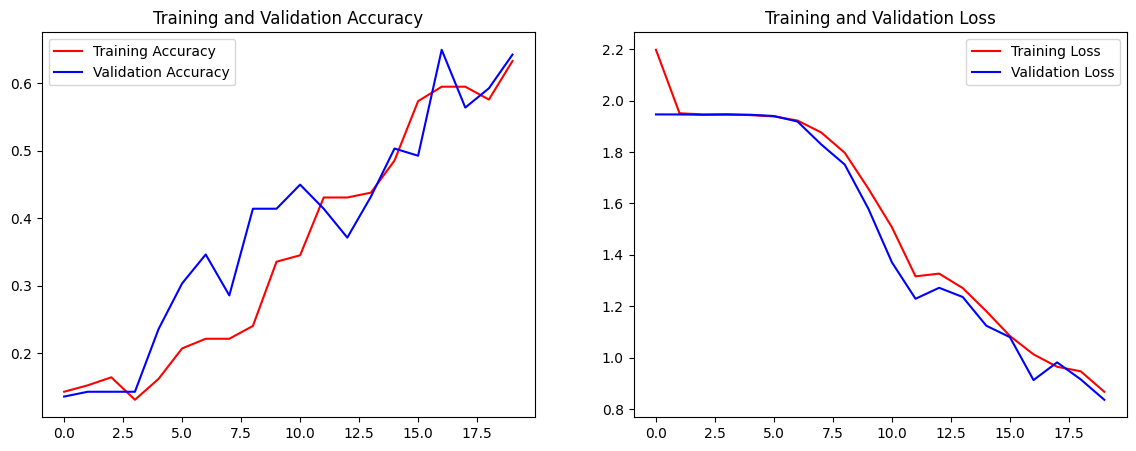

In [14]:
eval_plot(history)

In [24]:
evaluate(model)

Found 56 images belonging to 7 classes.


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step

Confusion Matrix

[[7 0 1 0 0 0 0]
 [0 8 0 0 0 0 0]
 [1 0 7 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 5 3 0]
 [0 0 0 7 0 1 0]
 [0 0 0 3 0 0 5]]


Classification Report

                                precision    recall  f1-score   support

 polabunga_uang_dua_puluh_ribu       0.88      0.88      0.88         8
       polabunga_uang_dua_ribu       1.00      1.00      1.00         8
polabunga_uang_lima_puluh_ribu       0.88      0.88      0.88         8
      polabunga_uang_lima_ribu       0.44      1.00      0.62         8
   polabunga_uang_sepuluh_ribu       1.00      0.62      0.77         8
   polabunga_uang_seratus_ribu       0.25      0.12      0.17         8
         polabunga_uang_seribu       1.00      0.62      0.77         8

                      accuracy                           0.73        56
                     macro avg       0.78      0.73      0.72        56
                  weighted avg       0.78      0.73      0.72        56



# **Predict New Image**

In [16]:
def predict_image(image_upload, model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 150, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[6]
  predict_class = np.argmax(model.predict(im_input))

# 'polabunga_uang_dua_puluh_ribu', 'polabunga_uang_dua_ribu', 'polabunga_uang_lima_puluh_ribu', 'polabunga_uang_lima_ribu', 'polabunga_uang_sepuluh_ribu', 'polabunga_uang_seratus_ribu', 'polabunga_uang_seribu'
  if predict_class == 0:
      predict_label = 'Rp. 20.000'
  elif predict_class == 1:
      predict_label = 'Rp. 2.000'
  elif predict_class == 2:
      predict_label = 'Rp. 50.000'
  elif predict_class == 3:
      predict_label = 'Rp. 5.000'
  elif predict_class == 4:
      predict_label = 'Rp. 10.000'
  elif predict_class == 5:
      predict_label = 'Rp. 100.000'
  else:
      predict_label = 'Rp. 1.000'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step




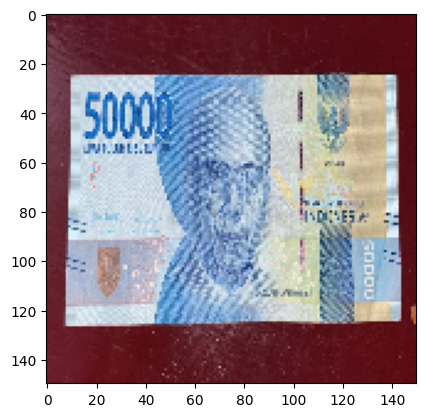


Image prediction result:  Rp. 50.000
Probability:  84.45 %




In [35]:
# Meminta pengguna untuk memasukkan path file gambar secara manual
path = input("Masukkan path file gambar: ")

# Memastikan bahwa path file yang dimasukkan pengguna adalah valid
if os.path.exists(path):
    # Memuat gambar dari path yang dimasukkan pengguna
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    
    # Praproses gambar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img = np.vstack([x])
    
    # Melakukan prediksi gambar
    predict_image(img, model)
else:
    print("Path file yang dimasukkan tidak valid.")